# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Load Data  

In [3]:
train_emo_file = os.path.join(os.getcwd(), "Vanessa_emoData", "train.txt")
test_emo_file = os.path.join(os.getcwd(), "Vanessa_emoData", "test.txt")
val_emo_file = os.path.join(os.getcwd(), "Vanessa_emoData", "val.txt")


train_df = pd.read_csv(train_emo_file, sep = ';', header = None, names = ['Text', 'Emotion'])
test_df = pd.read_csv(test_emo_file, sep = ';', header = None, names = ['Text', 'Emotion'])
val_df = pd.read_csv(val_emo_file, sep = ';', header = None, names = ['Text', 'Emotion'])

# merged_df = pd.concat([train_emo, test_emo, val_emo], ignore_index = True)
# merged_df

print("Train emotion data:\n", train_df)
print("\nTest emotion data:\n", test_df)
print("\nValidation emotion data:\n", val_df)


Train emotion data:
                                                     Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

Test emotion data:
                                                    Text  Emotion
0     im feeling rather rotten so im not very ambiti...  sadness
1         

## Part 2: Define ML Problem

1. <b> What are we predicting? feature and label? </b>
    * We will be predicting emotions through text. This will be a kind of sentiment analysis problem. The label are five classes including "sadness", "joy", "anger", "fear", "love" and "surprise". The feature is the Text column that provides input that the model will extract from to classify into one of these labels.
2. <b> Why is this problem important? What business or real-life problems can be solved using this technique? </b>
    * This problem is crucial in business context including understanding customer experinece with company products or services through feedback. From that improve those services to attract more customers or prevent churn. Further, this text classification technique in NLP can be applied in market research such as studying social media users interation and trend, online therepy industry, financial services such as predicting stocks through news, and more. 

## Part 3: Explore Data

In [4]:
# YOUR CODE HERE

train_df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [5]:
train_df.describe()

,Text,Emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [6]:
test_df.describe()

,Text,Emotion
count,2000,2000
unique,2000,6
top,im feeling rather rotten so im not very ambiti...,joy
freq,1,695


In [7]:
val_df.describe()

,Text,Emotion
count,2000,2000
unique,1998,6
top,i feel so tortured by it,joy
freq,2,704


In [8]:
train_df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [9]:
merged_df = pd.concat([train_df,test_df, val_df], ignore_index = True)

merged_df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [10]:
merged_df['Emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

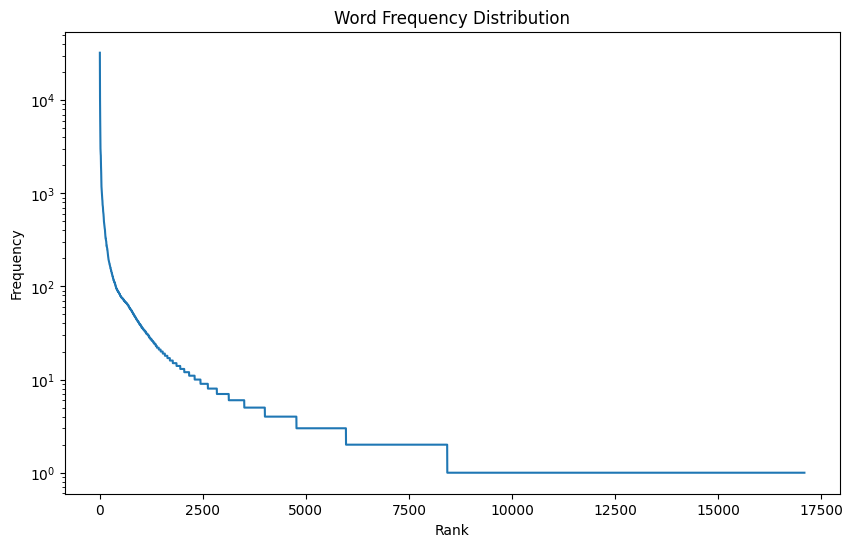

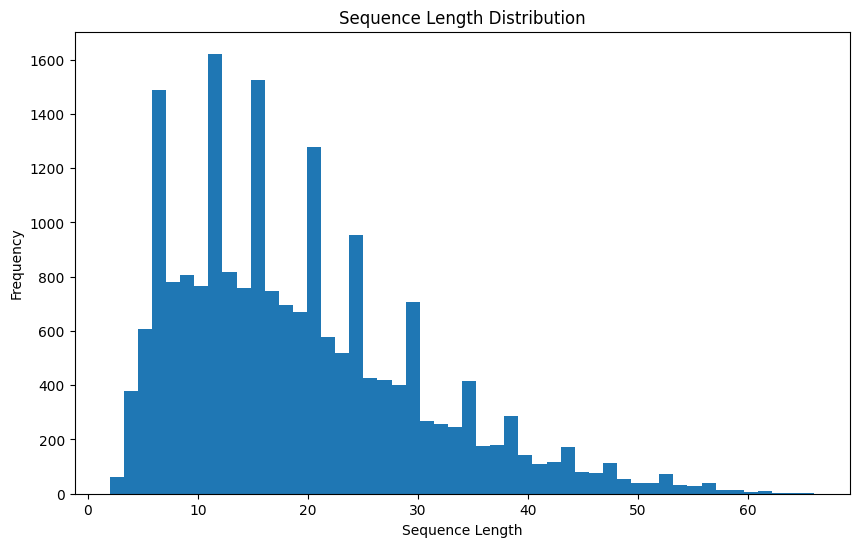

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D 
# from keras.utils import to_categorical 
from keras.preprocessing.text import Tokenizer

X = merged_df['Text']
y = merged_df['Emotion']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

#Analyse vocabulary size
word_counts = tokenizer.word_counts
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# plot word frequency distribution
word_freqs = [count for word, count in word_counts]
plt.figure(figsize=(10, 6))
plt.plot(word_freqs)
plt.yscale('log')
plt.title('Word Frequency Distribution')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Analyse sequence lengths
sequence_lengths = [len(seq) for seq in sequences]
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

### Plot 1:
* We can see that there are only about 7000-8000 words that have high frequency, or appear more often compare to the rest in the data
### Plot 2:
* The longest sentence or text is about 60-70 words, and the longer a sentence is, the less frequent it is in the dataset

## Part 4: Implement ML models

# 1. Logistic Regresison

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier


X = merged_df['Text']
y = merged_df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english') 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#train LR model:
lg_model = LogisticRegression(max_iter = 100)
lg_model.fit(X_train_tfidf, y_train)

lg_pred_train = lg_model.predict(X_train_tfidf)
lg_acc_train = accuracy_score(y_train, lg_pred_train)

print("Logistic Regression on Training Data:")
print(classification_report(y_train, lg_pred_train))
print(f"Logistic Regression Accuracy (Training): {lg_acc_train}")

lg_pred_test = lg_model.predict(X_test_tfidf)
lg_acc_test = accuracy_score(y_test, lg_pred_test)

print("\nLogistic Regression on Testing Data:")
print(classification_report(y_test, lg_pred_test))
print(f"Logistic Regression Accuracy (Testing): {lg_acc_test}")

## Logistic Regression Predictions

In [13]:
# Logistic Regression prediction examples: 

lg_results = pd.DataFrame({
    'Text': X_test,
    'True Label': y_test,
    'Predicted Label': lg_pred_test
})

print("Logistic Regression Predictions:")
print(lg_results.head(10))

Logistic Regression Predictions:
                                                    Text True Label  \
12136  i feel bedroom rockers and hardcore music buff...        joy   
16812  i go again sometime in the future id probably ...        joy   
10072  i just got a whole pile of presents so im feel...        joy   
5850   i feel like a dangerous animal as i prowl out ...      anger   
4320   i quite like to do it standing on public trans...    sadness   
4429   i am left feeling happy about having the time ...        joy   
11744  i was feeling threatened that it might be take...       fear   
12106    im feeling a bit frustrated with myself tonight      anger   
4230   i feel any artist that puts forth a piece of w...        joy   
16858                   i feel like i just doomed myself    sadness   

      Predicted Label  
12136             joy  
16812             joy  
10072             joy  
5850            anger  
4320          sadness  
4429              joy  
11744            

In [14]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Prepare data
# X = merged_df['Text']
# y = merged_df['Emotion']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # Encode text data with TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

# # Standardize the data
# scaler = StandardScaler(with_mean=False)  # With sparse matrices, 'with_mean' should be False
# X_train_tfidf = scaler.fit_transform(X_train_tfidf)
# X_test_tfidf = scaler.transform(X_test_tfidf)

# # Hyperparameter tuning for Logistic Regression
# param_grid = {
#     'C': [1, 10, 100, 300],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Regularization type
#     'solver': ['liblinear', 'saga']  # Solver for 'l1' or 'l2' penalty
# }

# grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_tfidf, y_train)

# # Get the best model from grid search
# best_lg_model = grid_search.best_estimator_
# lg_pred_train = best_lg_model.predict(X_train_tfidf)
# lg_pred_test = best_lg_model.predict(X_test_tfidf)

# # Evaluate on training data
# lg_acc_train = accuracy_score(y_train, lg_pred_train)
# print("Best Logistic Regression Model on Training Data:")
# print(classification_report(y_train, lg_pred_train))
# print(f"Logistic Regression Accuracy (Training): {lg_acc_train}")

# # Evaluate on testing data
# lg_acc_test = accuracy_score(y_test, lg_pred_test)
# print("\nBest Logistic Regression Model on Testing Data:")
# print(classification_report(y_test, lg_pred_test))
# print(f"Logistic Regression Accuracy (Testing): {lg_acc_test}")

# # Display best parameters and cross-validation results
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-validation Accuracy:", grid_search.best_score_)


## Method:
* We define X feature is "Text" column, and y label is "Emotion" column
* We split data into 30% training, 70% testing
* Preprocessing text: 
* Apply TF-IDF: weight the importance of words based on their frequency and distribution in the corpus
* We first use TF-IDF Vectorizer fit on training data, then transform both training and testing data to ensure consistent features
* Apply ngrams: capture more contexts and word dependencies in the input text
* Apply stop-words: remove unnecessary words in the input text 
## Result
* Use classification-report: show details evaluation methods to compare on different metrics such as precision score, recall, f1-score, support and accuracy
* Final Accuracy: 87%

# 2. LSTM 

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

#based on plots
max_words = 8000
max_len = 70

tokenizer = Tokenizer(num_words = max_words) #limit number of words
tokenizer.fit_on_texts(X)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen = max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen = max_len)

# encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

#Create LSTM model
def lstm_model(input_length, vocab_size, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim= vocab_size, output_dim = 100, input_length = input_length))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout = 0.2, recurrent_dropout= 0.2))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 

vocab_size = max_words
input_length = max_len
num_classes = y_train_categorical.shape[1]

lstm = lstm_model(input_length, vocab_size, num_classes)
lstm.fit(X_train_padded, y_train_categorical, epochs = 5, batch_size = 32, verbose = 1)

#convert from encoded label back to str format
lstm_pred = np.argmax(lstm.predict(X_test_padded), axis = 1)

lstm_acc = accuracy_score(y_test_encoded, lstm_pred)

print("LSTM:")
print(classification_report(y_test_encoded, lstm_pred, target_names=label_encoder.classes_))
print(f"LSTM Accuracy: {lstm_acc}")


Epoch 1/5
438/438 [==============================] - 19s 40ms/step - loss: 1.2501 - accuracy: 0.5180
Epoch 2/5
438/438 [==============================] - 17s 40ms/step - loss: 0.3760 - accuracy: 0.8863
Epoch 3/5
438/438 [==============================] - 17s 40ms/step - loss: 0.1792 - accuracy: 0.9409
Epoch 4/5
438/438 [==============================] - 17s 40ms/step - loss: 0.1172 - accuracy: 0.9604
Epoch 5/5
438/438 [==============================] - 17s 40ms/step - loss: 0.0900 - accuracy: 0.9673
LSTM:
              precision    recall  f1-score   support

       anger       0.90      0.94      0.92       757
        fear       0.92      0.87      0.89       717
         joy       0.95      0.93      0.94      2092
        love       0.79      0.86      0.82       498
     sadness       0.97      0.96      0.96      1750
    surprise       0.79      0.80      0.79       186

    accuracy                           0.92      6000
   macro avg       0.88      0.89      0.89      6000
w

## LSTM Predictions

In [16]:
#convert labels back to string format 
lstm_pred_test = np.argmax(lstm.predict(X_test_padded), axis=1)
lstm_pred_labels = label_encoder.inverse_transform(lstm_pred_test)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
lstm_acc_test = accuracy_score(y_test_encoded, lstm_pred_test)

print("LSTM:")
print(classification_report(y_test_encoded, lstm_pred_test, target_names=label_encoder.classes_))
print(f"LSTM Accuracy: {lstm_acc_test}")

# Create a dataframe to view the predictions
lstm_results = pd.DataFrame({
    'Text': X_test,
    'True Label': y_test_labels,
    'Predicted Label': lstm_pred_labels
})

# Display some examples
print("LSTM Predictions:")
print(lstm_results.head(10))

LSTM:
              precision    recall  f1-score   support

       anger       0.91      0.92      0.91       757
        fear       0.89      0.88      0.88       717
         joy       0.93      0.94      0.94      2092
        love       0.81      0.84      0.82       498
     sadness       0.98      0.95      0.96      1750
    surprise       0.72      0.81      0.76       186

    accuracy                           0.92      6000
   macro avg       0.87      0.89      0.88      6000
weighted avg       0.92      0.92      0.92      6000

LSTM Accuracy: 0.9196666666666666
LSTM Predictions:
                                                    Text True Label  \
12136  i feel bedroom rockers and hardcore music buff...        joy   
16812  i go again sometime in the future id probably ...        joy   
10072  i just got a whole pile of presents so im feel...        joy   
5850   i feel like a dangerous animal as i prowl out ...      anger   
4320   i quite like to do it standing on pub

## Method:
* Use the defined X feature is "Text" column, and y label is "Emotion" column
* We use the same splitted data of 30% training, 70% testing
+ Preprocessing text: 
* Tokenization: sequences of text into integers where each integer represents a word 
* Padding: make sure all sequences have the same length by padding shorter seuqences with zero
* Label encode output text into numeric
+ LSTM model:
* Sequential model that contains several layers
* Embedding layer: convert sequences into dense vectors with fixed size
* LSTM layer: capture temporal dependencies of the data, also added dropout rate initialized by the dropout layer to prevent overfitting
* Dense layer: output layer with 'softmax' activation function
* Compile model using 'adam' optimizer 
## Result
* Use classification-report: show details evaluation to compare on different metrics such as precision score, recall, f1-score, support and accuracy
* Final Accuracy: 91%

# 3. Compare Models 

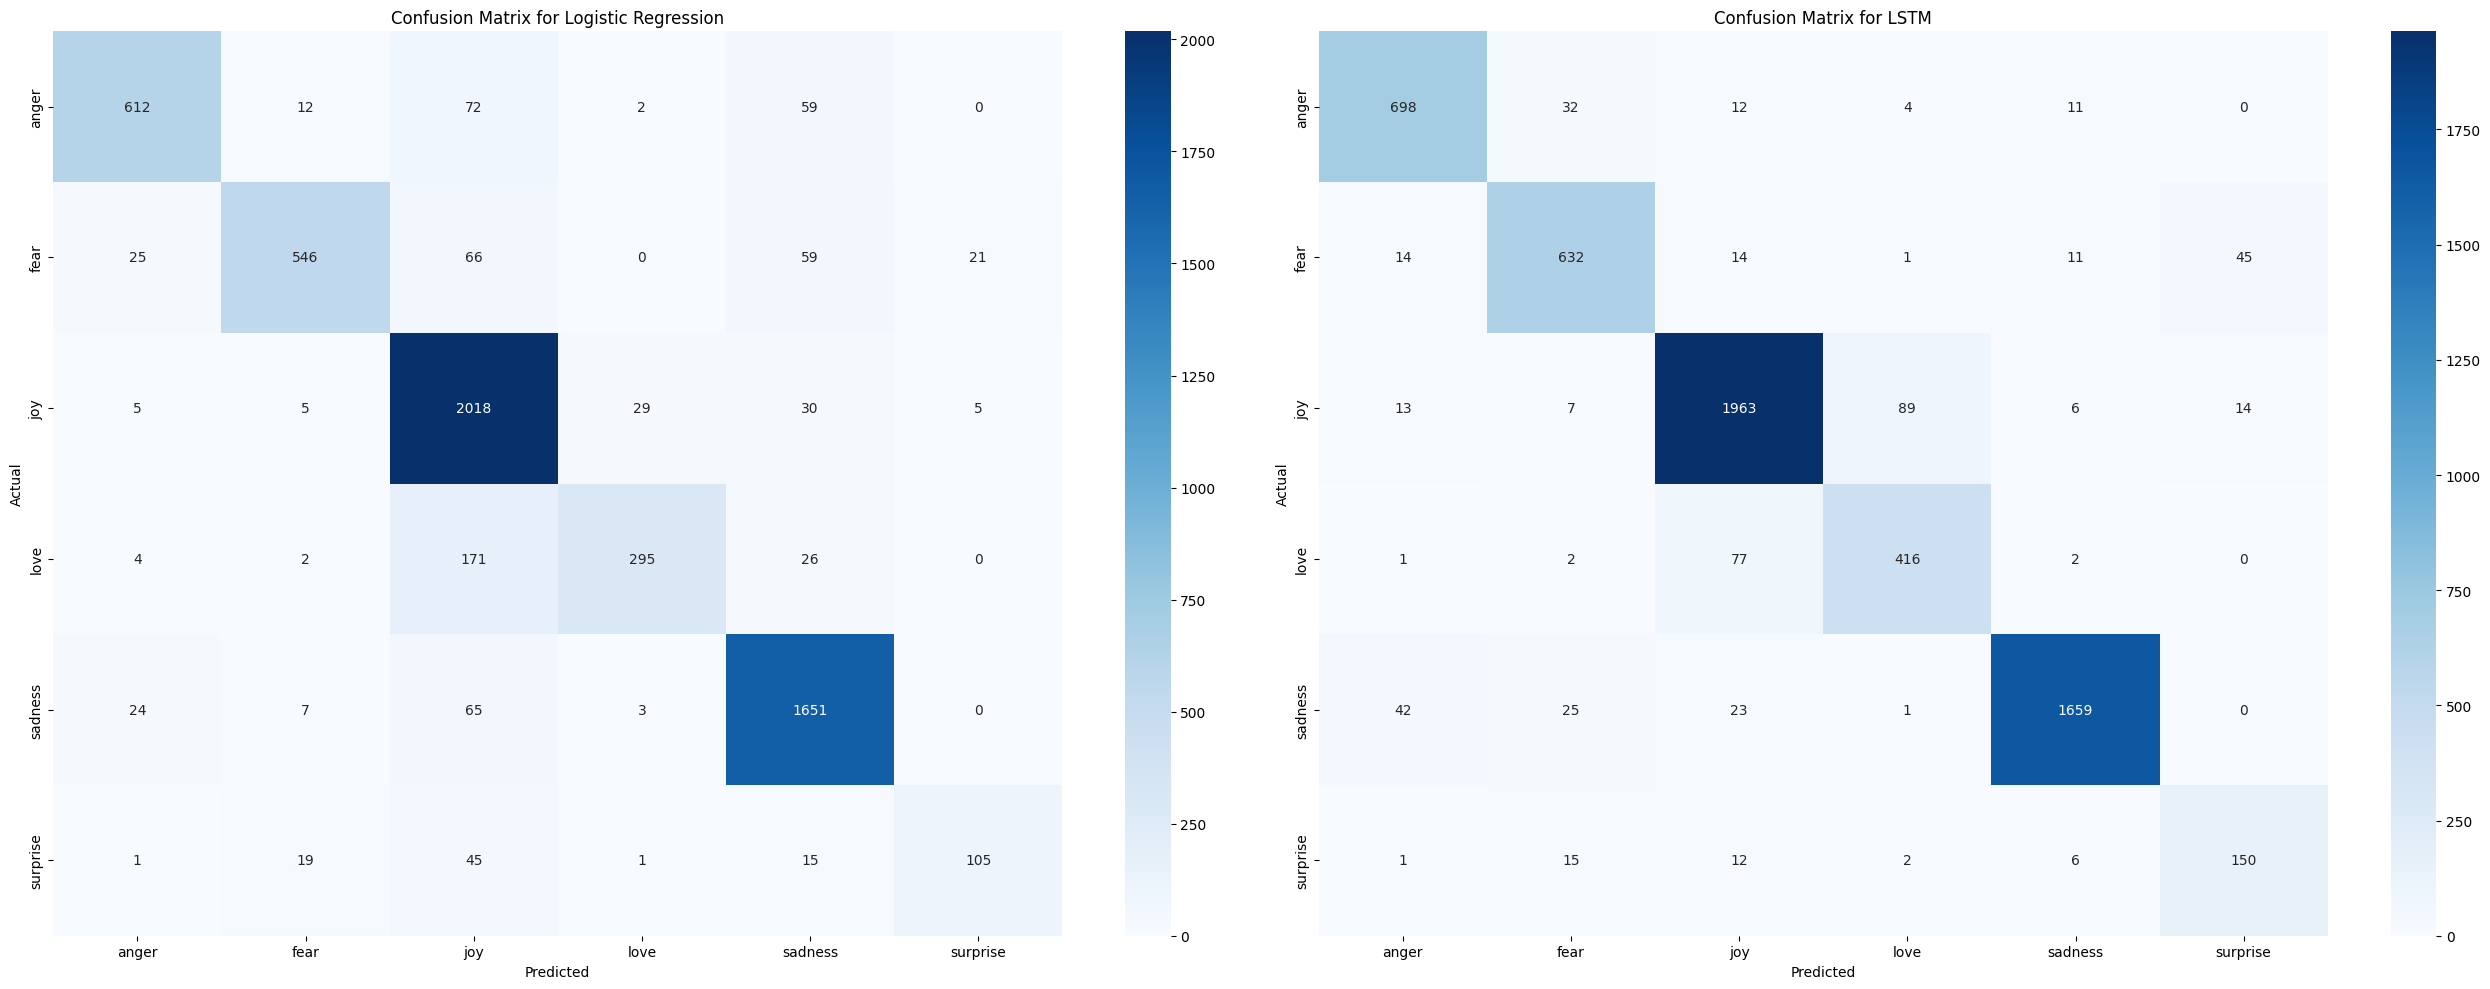

In [17]:
lg_cm = confusion_matrix(y_test, lg_pred_test)
lstm_cm = confusion_matrix(y_test_encoded, lstm_pred)

fig, axes = plt.subplots(1, 2, figsize=(26, 10))

sns.heatmap(lg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix for Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix for LSTM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Discussion:
* Accuracy: 87% (Logistic Regression) and 91% (LSTM). On the same data split and confusion matrix, we can see that LSTM works better than Logistic Regression in general.
* However, noticed that there are cetain labels that both models predict better than others such as "joy" and "sadness". Looking back at the data analysis at the beginning, we can see that "joy" has 6761 and "sadness" has 5797 data while other labels have less than 3000 data, and "surprise" has the least with 719 data. This explains why both models perform well on some particular labels and not too well on others. 